![im1](im1.png)
[Enlace interesante](https://roboticsknowledgebase.com/wiki/math/gaussian-process-gaussian-mixture-model/)  
[Overfitting en no supervisado](https://stats.stackexchange.com/questions/250212/is-overfitting-a-problem-in-unsupervised-learning)  
[Gaussian Mixture](https://apmonitor.com/pds/index.php/Main/GaussianMixtureModel)

![im2](im2.png)

![im3](im3.png)

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display='diagram')

In [18]:
df = pd.read_csv('iris.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
## KMeans : No supervisado...

X = df.drop(columns = 'class')
y = df['class'].astype('category').cat.codes

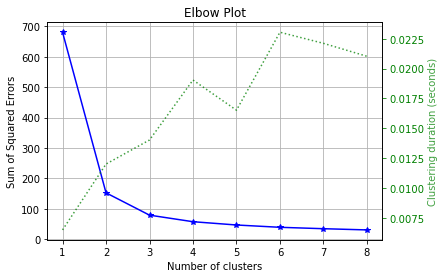

In [20]:
import scikitplot as skplt  
km = KMeans(random_state=123)
skplt.cluster.plot_elbow_curve(km, X, cluster_ranges=range(1,9));

In [24]:
## algoritmos de clustering no es necesario aplicar train_test_split
pipe = Pipeline(steps= [
    ('sc', StandardScaler()), #escala de las variables...
    ('km', KMeans(n_clusters=3,random_state=123))
])

cl_number = pipe.fit_predict(X) # entrenando el modelo... 

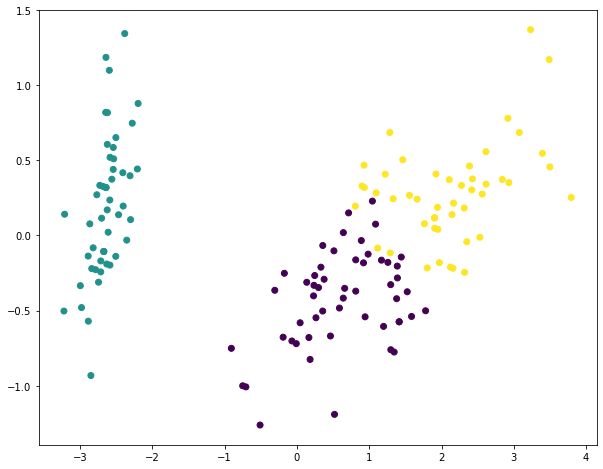

In [28]:
pca = PCA(n_components = 2, random_state=123)
components = pca.fit_transform(X)
plt.figure(figsize=(10,8))
plt.scatter(components[:,0],components[:,1], c = cl_number)

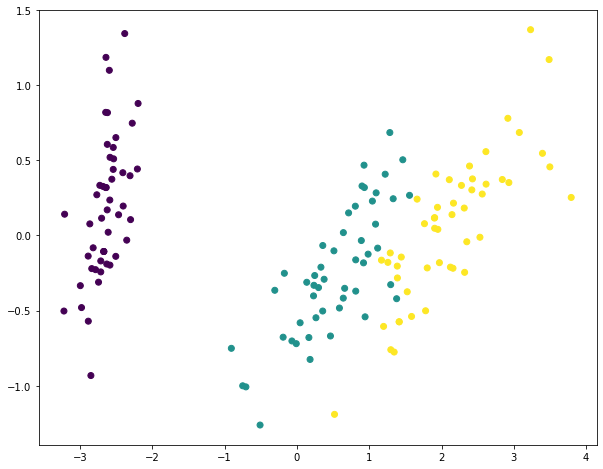

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(components[:,0],components[:,1], c = y);

In [36]:
## GMM

gmm = GaussianMixture(n_components=3, random_state=123)
cl_number_gmm = gmm.fit_predict(X) ## cl_number
cl_number_proba = gmm.predict_proba(X)

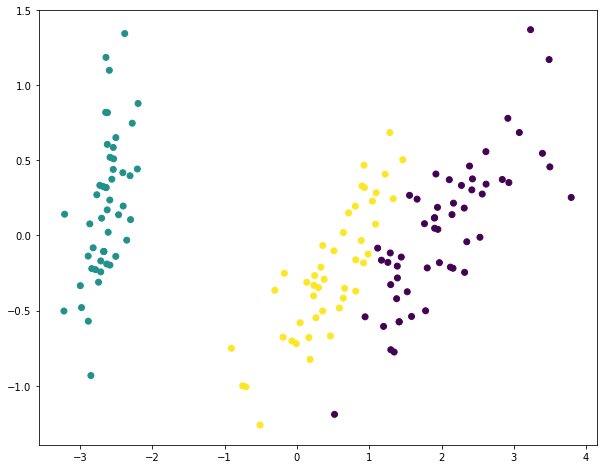

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(components[:,0],components[:,1], c = cl_number_gmm);

In [50]:
# LDA: Latent Dirichlet Allocation ... Topic Modelling
# Teoricamente Dirichlet como modela bien la distribución de palabras en un texto
# Aplicación en NLP Natural Language Processing
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('letras_sample.csv', index_col = 'index').drop(columns = 'Unnamed: 0')
df

,song,year,artist,genre,lyrics
index,,,,,
85071,beautiful-newborn-child,2006,the-animals,Rock,Oh yeah I'm a child of the funky time Oh yeah ...
38294,your-always-be-my-baby,2009,david-cook,Rock,We were as one babe For a moment in time And i...
204298,need-a-man-blues,2006,bronski-beat,Pop,He e hey I got those need a man blues Driving ...
28457,you-re-fooling-you,2000,the-dramatics,R&B,You ain't fooling me Huh huh no well Well well...
213862,brutal-hearts,2010,bedouin-soundclash,Rock,Are you the Brutal Heart Are you the Brutal He...
...,...,...,...,...,...
55888,villa-vampiria,2007,god-dethroned,Metal,Scum of the earth Winged vermin of the night S...
67563,no-love,2007,the-gc5,Rock,Get your head out of the clouds kid Get your h...
347540,newport-living,2007,cute-is-what-we-aim-for,Rock,Everyone's a let down It just depends on how f...


In [57]:
df.lyrics.iloc[0]

"Oh yeah I'm a child of the funky time Oh yeah my people have committed ugly crimes And in the process of me breaking free I have inherited a painful legacy I have even created some ugly children for you to adopt That you have chosen to embrace You embrace the ugly the dyin and the freak Only because he is a part of you and you are afraid to speak Deep down way down in the depths of you He is ready to take over and rape the last part of the sanity in your mind Let him out let him out let him run wild scream free Get crazy and forget about music what it was what it is or what its supposed to be Give it to the day give in to the funky Give in to the gypsy to the nigger in you soul and fly free Fly free Give it to the Oh lord curse of the newborn child The incredible madness of just you and then Yeah yeah Maybe we will see A beautiful newborn child Something beautiful something beautiful etc Burdon WAR "

In [59]:
# Encontrar tópicos asociados a las letras ... les aviso este modelo no va a funcionar bien... 1000 filas.

df.genre.value_counts()

Rock          457
Pop           135
Metal         110
Hip-Hop       105
Country        71
Jazz           36
Electronic     32
R&B            16
Indie          15
Other          14
Folk            9
Name: genre, dtype: int64

## Data Augmentation en Texto... Traducir a alemán y luego de alemán al inglés.

[Doc LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

In [62]:
pipe = Pipeline (steps = [
    ('cv', CountVectorizer(stop_words = 'english', ngram_range=(1,3))),
    ('lda', LatentDirichletAllocation(n_components=10,n_jobs=-1, random_state=123))
])

pipe.fit(df.lyrics)

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('lda',
                 LatentDirichletAllocation(n_jobs=-1, random_state=123))])

In [72]:
words = pipe.named_steps.cv.get_feature_names_out()
words.shape

(11738,)

In [71]:
topics = pipe.named_steps.lda.components_ / pipe.named_steps.lda.components_.sum(axis=1)[:, np.newaxis]
topics.shape

(10, 11738)

In [73]:
topicos = pd.DataFrame(topics, columns = words).T
topicos

,0,1,2,3,4,5,6,7,8,9
000,0.000003,0.000010,0.000006,0.000011,0.000013,0.000008,0.000188,0.000012,0.000015,0.000009
0bit,0.000003,0.000010,0.000006,0.000011,0.000145,0.000008,0.000017,0.000012,0.000015,0.000009
10,0.000047,0.000107,0.000006,0.000011,0.000276,0.000176,0.000188,0.000012,0.000015,0.000172
100,0.000037,0.000010,0.000006,0.000011,0.000013,0.000008,0.000017,0.000012,0.000015,0.000009
100k,0.000003,0.000010,0.000006,0.000011,0.000013,0.000008,0.000188,0.000012,0.000015,0.000009
...,...,...,...,...,...,...,...,...,...,...
zone,0.000003,0.000010,0.000006,0.000011,0.001456,0.000092,0.000188,0.000012,0.000167,0.000107
zonin,0.000003,0.000010,0.000006,0.000011,0.000013,0.000008,0.000017,0.000012,0.000167,0.000009
zoo,0.000003,0.000010,0.000067,0.000011,0.000013,0.000092,0.000188,0.000012,0.000015,0.000009
zoogang,0.000003,0.000010,0.000006,0.000011,0.000013,0.000176,0.000017,0.000012,0.000015,0.000009


In [74]:
def call_top_topics(topics_df, topic_n, top_n):
    return topics_df[topic_n].sort_values(ascending=False).head(top_n)

call_top_topics(topicos, 0, 20) # POP Romantica ... Britney Spears

love     0.018350
don      0.015871
know     0.015080
baby     0.014950
like     0.013356
just     0.013036
got      0.010838
ll       0.008624
time     0.007323
want     0.007037
way      0.007009
cause    0.006682
make     0.006628
gonna    0.006452
say      0.006305
heart    0.006114
nigga    0.005751
ain      0.005700
think    0.005604
let      0.005342
Name: 0, dtype: float64

In [87]:
call_top_topics(topicos, 4, 30) 

love         0.014877
ve           0.009314
like         0.008477
got          0.007766
gonna        0.007536
air          0.007163
whoa         0.006508
time         0.006492
plus         0.005726
away         0.004819
ya           0.004700
life         0.004553
know         0.004501
ll           0.004400
think        0.004198
way          0.004147
cause        0.003941
fish         0.003827
said         0.003825
don          0.003800
mongoloid    0.003696
heart        0.003536
let          0.003521
break        0.003418
won          0.003408
mind         0.003281
hands        0.003225
thing        0.003209
good         0.003171
little       0.003038
Name: 4, dtype: float64

In [89]:
pd.DataFrame(pipe.transform(df.lyrics)).sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Length: 1000, dtype: float64

In [91]:
df.lyrics.iloc[998]

"Just 18 I've seen the world Done more than some their whole lives unfold Still at school just saving face But a month today I'll be leaving this place I've lived a million lives so far But I'm still naive and a broken heart I feel like I've heard it all before With a whole life ahead to hear a whole lot more You wouldn't believe half the things I've seen Way too much for just 18 I've written songs about them all so far And played them all on an acoustic guitar Life is good it's been alright to me I've recorded my heart on a couple LP's It all comes down to the same old thing Trying to find someone to share it with I'm lost I know that the world is weird I'm swimming in waters that I used to fear Crazy things have made me kind of tough Sometimes I think that I've seen too much Just 18 I've seen the world Done more than some their whole lives unfold Still at school just saving face But a month today I'll be leaving this place But a month today I'll be leaving this place"